In [1]:
# call code to simulate action potentials via FHN biophysical model
import simFHN as fhn
import scipy as sp

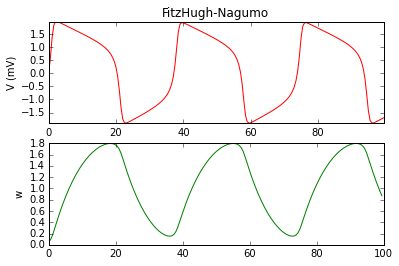

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


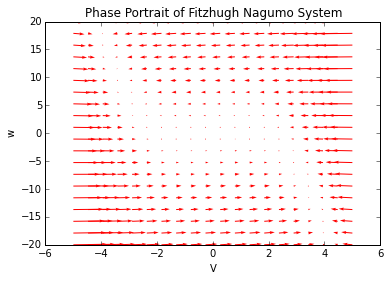

In [2]:
# pass in parameters to generate and plot the simulated data and phase portrait of the system
%matplotlib inline
t = sp.arange(0.0, 100, .5)
a = 0.7
b = 0.8

[V, w2] = fhn.simFN(a,b,t,True,1)

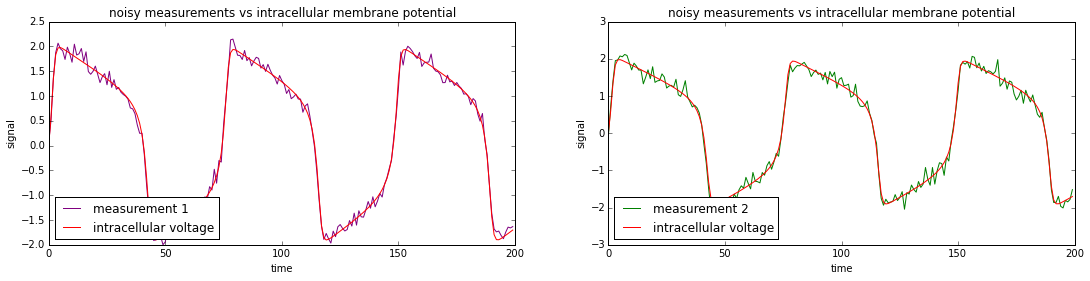

In [3]:
# generate noisy data and plot observations from two neurons over true intracellular membrane potential
import numpy as np
import matplotlib.pyplot as plt
obs1 = V + np.random.normal(0,.1,len(t))
obs2 = V + np.random.normal(0,.15,len(t))

plt.subplot(121)
time = np.arange((len(t)))
lo = plt.plot(time, obs1, 'purple', time, V, 'red')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('noisy measurements vs intracellular membrane potential')
plt.legend(lo, ('measurement 1','intracellular voltage'), loc='lower left')


plt.subplot(122)
lo = plt.plot(time,obs2, 'green', time, V, 'red')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('noisy measurements vs intracellular membrane potential')
plt.legend(lo, ('measurement 2','intracellular voltage'), loc='lower left')
plt.subplots_adjust(right=2.5, hspace=.95)

In [4]:
# import auxiliary particle filter code
from apf_fhn import *
n_particles = 500

In [5]:
import numpy as np
Sigma = .15*np.asarray([[1, .15],[.15, 1]])
Gamma = .12*np.asarray([[1, .15], [.15, 1]])
B = np.diag([1,3])
T = len(t)
x_0 = [0,0]#[0,0]
Obs = np.asarray([obs1]).T
I_ext = 1

In [6]:
# run particle filter
import timeit
start_time = timeit.default_timer()
[w, x, k] = apf(Obs, T, n_particles, 10, B, Sigma, Gamma, x_0, I_ext)
elapsed = timeit.default_timer() - start_time

time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9
time:  10
time:  11
time:  12
time:  13
time:  14
time:  15
time:  16
time:  17
time:  18
time:  19
time:  20
time:  21


apf_fhn.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  W[i,t] = (g*f)/(k[i,t]*q)


time:  22


apf_fhn.py:136: RuntimeWarning: invalid value encountered in divide
  Xprime = np.random.choice(n_particles, n_particles, p = W[:,t-1]/np.sum(W[:,t-1]), replace = True)
apf_fhn.py:136: RuntimeWarning: invalid value encountered in less
  Xprime = np.random.choice(n_particles, n_particles, p = W[:,t-1]/np.sum(W[:,t-1]), replace = True)


time:  23
time:  24
time:  25
time:  26
time:  27
time:  28
time:  29
time:  30
time:  31
time:  32
time:  33
time:  34
time:  35
time:  36
time:  37
time:  38
time:  39
time:  40
time:  41
time:  42
time:  43
time:  44
time:  45
time:  46
time:  47
time:  48
time:  49
time:  50
time:  51
time:  52
time:  53
time:  54
time:  55
time:  56
time:  57
time:  58
time:  59
time:  60
time:  61
time:  62
time:  63
time:  64
time:  65
time:  66
time:  67
time:  68
time:  69
time:  70
time:  71
time:  72
time:  73
time:  74
time:  75
time:  76
time:  77
time:  78
time:  79
time:  80
time:  81
time:  82
time:  83
time:  84
time:  85
time:  86
time:  87


apf_fhn.py:150: RuntimeWarning: overflow encountered in double_scalars
  W[i,t] = (g*f)/(k[i,t]*q)


time:  88
time:  89
time:  90
time:  91
time:  92
time:  93
time:  94
time:  95
time:  96
time:  97
time:  98
time:  99
time:  100
time:  101
time:  102
time:  103
time:  104
time:  105
time:  106
time:  107
time:  108
time:  109
time:  110
time:  111
time:  112
time:  113
time:  114
time:  115
time:  116
time:  117
time:  118
time:  119
time:  120
time:  121
time:  122
time:  123
time:  124
time:  125
time:  126
time:  127
time:  128
time:  129
time:  130
time:  131
time:  132
time:  133
time:  134
time:  135
time:  136
time:  137
time:  138
time:  139
time:  140
time:  141
time:  142
time:  143
time:  144
time:  145
time:  146
time:  147
time:  148
time:  149
time:  150
time:  151
time:  152
time:  153
time:  154
time:  155
time:  156
time:  157
time:  158
time:  159
time:  160
time:  161
time:  162
time:  163
time:  164
time:  165
time:  166
time:  167
time:  168
time:  169
time:  170
time:  171
time:  172
time:  173
time:  174
time:  175
time:  176
time:  177
time:  178
time:  179


In [7]:
print "time elapsed: ", elapsed, "seconds or", (elapsed/60.0), "minutes", "\ntime per iteration: ", elapsed/T

time elapsed:  822.303689957 seconds or 13.7050614993 minutes 
time per iteration:  4.11151844978


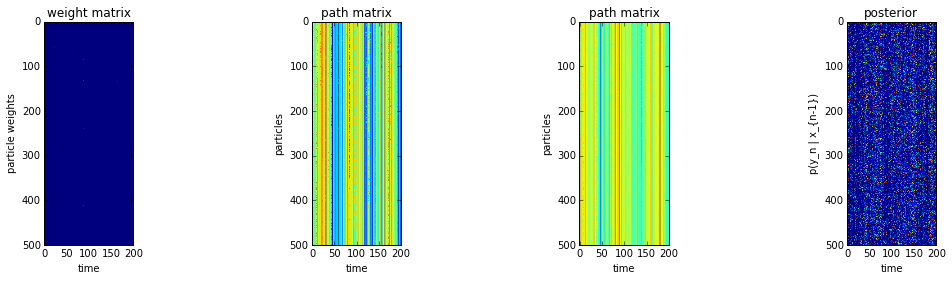

In [8]:
# visualize parameters
import matplotlib.pyplot as plt
%matplotlib inline
#parts = np.array([np.array(xi) for xi in w])
plt.subplot(141)
plt.imshow(w)
plt.xlabel('time')
plt.ylabel('particle weights')
plt.title('weight matrix')
plt.subplot(142)
plt.imshow(x[:,:,0])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(143)
plt.imshow(x[:,:,1])
plt.xlabel('time')
plt.ylabel('particles')
plt.title('path matrix')
plt.subplot(144)
plt.imshow(k)
plt.xlabel('time')
plt.ylabel('p(y_n | x_{n-1})')
plt.title('posterior')
plt.subplots_adjust(right=2.5, hspace=.75)

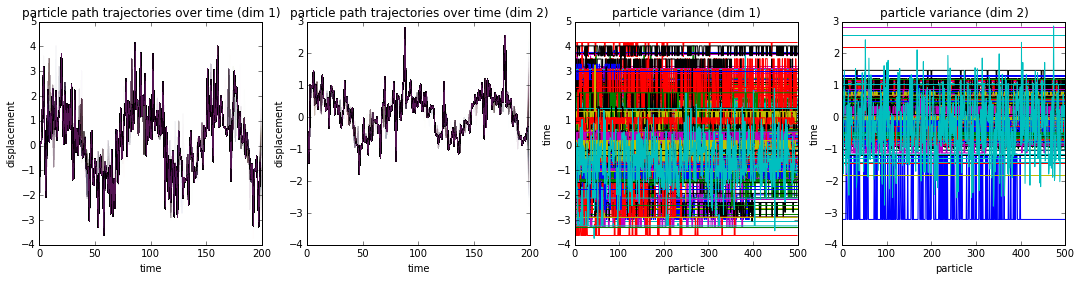

In [9]:
# examine particle trajectories over time
plt.subplot(141)
plt.plot(np.transpose(x[:,:,0]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 1)')

plt.subplot(142)
plt.plot(np.transpose(x[:,:,1]), alpha=.01, linewidth=1.5)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('particle path trajectories over time (dim 2)')


plt.subplot(143)
plt.plot(x[:,:,0])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 1)')
plt.subplot(144)

plt.plot(x[:,:,1])
plt.xlabel('particle')
plt.ylabel('time')
plt.title('particle variance (dim 2)')
plt.subplots_adjust(right=2.5, hspace=.85)

In [10]:
# average over particle trajectories to obtain predicted state means for APF output
predsignal1 = np.mean(x[:,:,0], axis=0)
predsignal2 = np.mean(x[:,:,1], axis=0)

In [11]:
x.shape

(500, 200, 2)

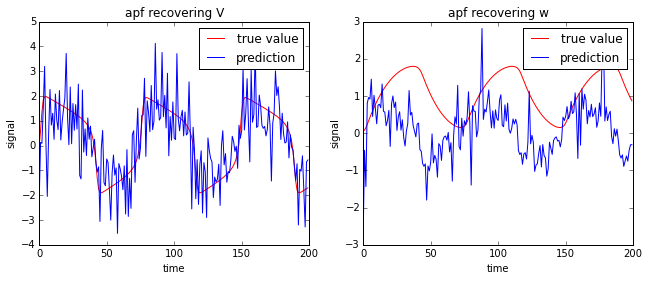

In [12]:
# check raw signal before applying smoothing or shifting
time = np.arange(T)

plt.subplot(121)
plt.title('apf recovering V')
lo = plt.plot(time, V, 'r', time, predsignal1, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))

plt.subplot(122)
plt.title('apf recovering w')
lo = plt.plot(time, w2, 'r', time, predsignal2, 'b')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend(lo, ('true value','prediction'))
plt.subplots_adjust(right=1.5, hspace=.75)

In [20]:
# shift and scale the signal
# TO DO: update code...
predsignal3 = predsignal2 + I_ext
w3 = w2[20:800]
predsignal4 = predsignal3[0:780]
print len(w2), len(predsignal4)


200 200


In [23]:
# define a moving average to smooth the signals
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

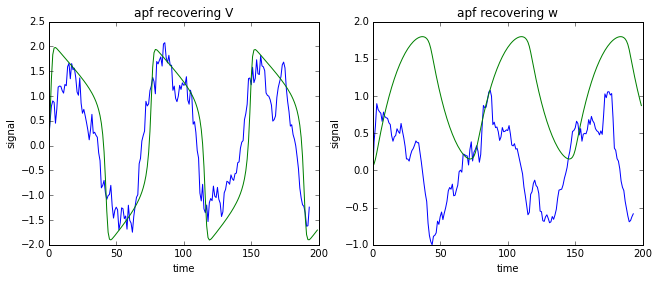

In [24]:
# Smoothed Signal
plt.subplot(121)
plt.title('apf recovering V')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal1))
plt.plot(V)

plt.subplot(122)
plt.title('apf recovering w')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal2))
plt.plot(w2)
plt.subplots_adjust(right=1.5, hspace=.85)

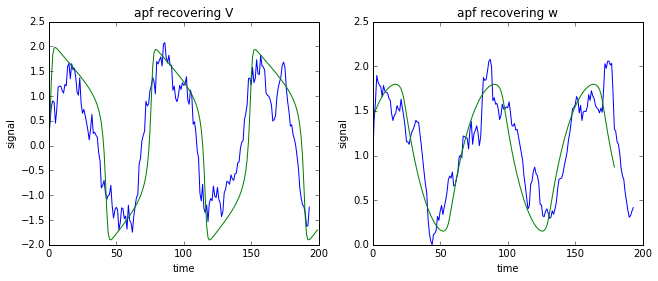

In [25]:
# Shifted and Scaled
plt.subplot(121)
plt.title('apf recovering V')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal1))
plt.plot(V)

plt.subplot(122)
plt.title('apf recovering w')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(moving_average(predsignal4))
plt.plot(w3)
plt.subplots_adjust(right=1.5, hspace=.85)